In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [7]:
bank_details = pd.read_csv("/content/Bank_Personal_Loan_Modelling.csv")
bank_details

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0


### EDA

In [8]:
bank_details_df = pd.DataFrame(bank_details)

bank_details_df

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0


In [9]:
bank_details_df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [10]:
bank_details_df.columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')

In [11]:
bank_details_df.dtypes

ID                      int64
Age                     int64
Experience              int64
Income                  int64
ZIP Code                int64
Family                  int64
CCAvg                 float64
Education               int64
Mortgage                int64
Personal Loan           int64
Securities Account      int64
CD Account              int64
Online                  int64
CreditCard              int64
dtype: object

In [12]:
bank_details_df.info()
bank_details_df.corr()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
ID,1.000000,-0.008473,-0.008326,-0.017695,0.013432,-0.016797,-0.024675,0.021463,-0.013920,-0.024801,-0.016972,-0.006909,-0.002528,0.017028
Age,-0.008473,1.000000,0.994215,-0.055269,-0.029216,-0.046418,-0.052012,0.041334,-0.012539,-0.007726,-0.000436,0.008043,0.013702,0.007681
Experience,-0.008326,0.994215,1.000000,-0.046574,-0.028626,-0.052563,-0.050077,0.013152,-0.010582,-0.007413,-0.001232,0.010353,0.013898,0.008967
Income,-0.017695,-0.055269,-0.046574,1.000000,-0.016410,-0.157501,0.645984,-0.187524,0.206806,0.502462,-0.002616,0.169738,0.014206,-0.002385
ZIP Code,0.013432,-0.029216,-0.028626,-0.016410,1.000000,0.011778,-0.004061,-0.017377,0.007383,0.000107,0.004704,0.019972,0.016990,0.007691
Family,-0.016797,-0.046418,-0.052563,-0.157501,0.011778,1.000000,-0.109275,0.064929,-0.020445,0.061367,0.019994,0.014110,0.010354,0.011588
CCAvg,-0.024675,-0.052012,-0.050077,0.645984,-0.004061,-0.109275,1.000000,-0.136124,0.109905,0.366889,0.015086,0.136534,-0.003611,-0.006689
Education,0.021463,0.041334,0.013152,-0.187524,-0.017377,0.064929,-0.136124,1.000000,-0.033327,0.136722,-0.010812,0.013934,-0.015004,-0.011014
Mortgage,-0.013920,-0.012539,-0.010582,0.206806,0.007383,-0.020445,0.109905,-0.033327,1.000000,0.142095,-0.005411,0.089311,-0.005995,-0.007231
Personal Loan,-0.024801,-0.007726,-0.007413,0.502462,0.000107,0.061367,0.366889,0.136722,0.142095,1.000000,0.021954,0.316355,0.006278,0.002802


In [13]:
import seaborn as sns

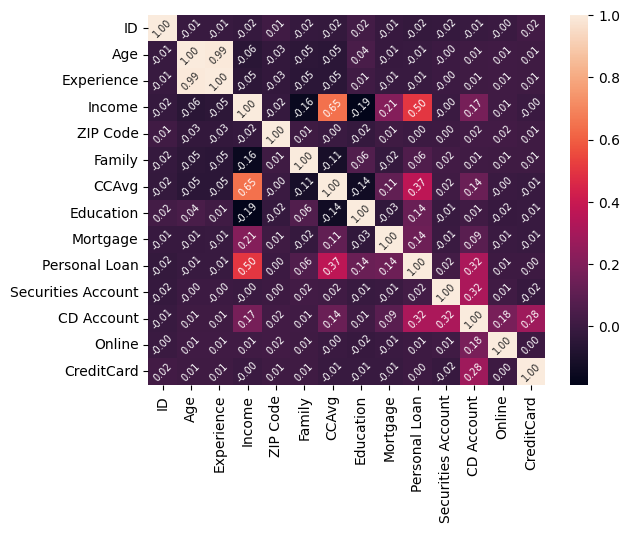

<Figure size 2500x2500 with 0 Axes>

In [14]:
sns.heatmap(bank_details_df.corr(), annot=True,
            annot_kws={'size': 7, 'rotation': 45}, fmt='.2f')
plt.figure(figsize=(25, 25), dpi = 100)
plt.show()

In [15]:
sns.pairplot(data=bank_details_df)
plt.show()

Output hidden; open in https://colab.research.google.com to view.

In [16]:
bank_details_df = bank_details_df.drop(["ID", "ZIP Code"], axis = 1)

In [17]:
bank_details_df.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,4,1.6,1,0,0,1,0,0,0
1,45,19,34,3,1.5,1,0,0,1,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,0,1


In [18]:
bank_details_df['Personal Loan'].value_counts()

Personal Loan
0    4520
1     480
Name: count, dtype: int64

In [19]:
from sklearn.utils import resample

not_approved = bank_details_df[bank_details_df["Personal Loan"]==0]
approved = bank_details_df[bank_details_df["Personal Loan"]==1]

df_resampled = resample(approved, replace=True,n_samples=len(not_approved)-480)
df_resampled



,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
316,57,31,165,1,1.6,2,0,1,0,0,1,0
4790,35,11,101,3,3.8,3,150,1,0,0,1,0
4267,52,26,194,2,5.7,2,0,1,0,0,1,0
174,42,17,168,2,7.9,2,0,1,0,0,1,0
174,42,17,168,2,7.9,2,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
2986,55,30,153,2,2.8,2,0,1,1,1,1,0
4642,65,40,143,4,6.6,2,0,1,0,0,1,0
2101,35,5,203,1,10.0,3,0,1,0,0,0,0
2586,47,23,149,4,6.1,1,0,1,0,0,0,1


In [20]:
df_resampled.reset_index(drop=True)
bank_details_df = pd.concat([bank_details_df, df_resampled], axis = 0)
bank_details_df.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,4,1.6,1,0,0,1,0,0,0
1,45,19,34,3,1.5,1,0,0,1,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,0,1


In [21]:
bank_details_df['Personal Loan'].value_counts()


Personal Loan
0    4520
1    4520
Name: count, dtype: int64

In [22]:
from sklearn.model_selection import train_test_split
X = bank_details_df.drop("Personal Loan", axis = 1)
Y = bank_details_df["Personal Loan"]
Y

0       0
1       0
2       0
3       0
4       0
       ..
2986    1
4642    1
2101    1
2586    1
654     1
Name: Personal Loan, Length: 9040, dtype: int64

In [23]:
X.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
0,25,1,49,4,1.6,1,0,1,0,0,0
1,45,19,34,3,1.5,1,0,1,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,1


In [24]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y, test_size=0.30, random_state=1)

### LOGISTIC REGRESSION

In [25]:
from sklearn import metrics
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(solver= "liblinear")
lr.fit(X_train,Y_train)

y_predict = lr.predict(X_test)

print(lr.score(X_train,Y_train))
print(lr.score(X_test,Y_test))

0.8974399494310998
0.8915929203539823


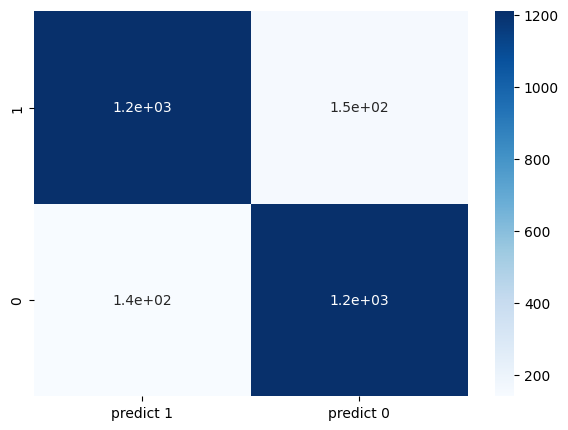

In [26]:
cm = metrics.confusion_matrix(Y_test,y_predict, labels = [1,0])
df_cm = pd.DataFrame(cm , index = [i for i in [1,0]], columns = [i for i in ["predict 1", "predict 0"]])

plt.figure(figsize=(7,5))
sns.heatmap(df_cm, annot=True,cmap="Blues")
plt.show()

### linear Regression

In [27]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

lin_reg = LinearRegression()

lin_reg.fit(X_train, Y_train)

y_pred = lin_reg.predict(X_test)


train_score = lin_reg.score(X_train, Y_train)
test_score = lin_reg.score(X_test, Y_test)

mse = mean_squared_error(Y_test, y_pred)

# Print scores
print("Training Score:", train_score)
print("Testing Score:", test_score)
print("Mean Squared Error:", mse)


Training Score: 0.6269152508097575
Testing Score: 0.6219674755539919
Mean Squared Error: 0.09450628076826623


### K NEAREAST NEIGHBORS


In [28]:
from sklearn.neighbors import KNeighborsClassifier

kn = KNeighborsClassifier(n_neighbors=5, weights="distance")

kn.fit(X_train,Y_train)

yk_predict = kn.predict(X_test)

print(kn.score(X_train,Y_train))
print(kn.score(X_test,Y_test))


1.0
0.9365781710914455


In [29]:
#now to check what k value gives us the best result
from sklearn.model_selection import cross_val_score

score_1 = []

for i in range(1, 50):
  kn2 = KNeighborsClassifier(n_neighbors=i)
  score_2 = cross_val_score(kn2, X, Y, cv=10)
  score_1.append(score_2.mean())


print(score_1)

[0.9761061946902654, 0.9759955752212388, 0.9575221238938052, 0.9569690265486726, 0.943362831858407, 0.9418141592920355, 0.9285398230088496, 0.925, 0.91570796460177, 0.9130530973451327, 0.9044247787610619, 0.9038716814159292, 0.8980088495575222, 0.8996681415929204, 0.8965707964601771, 0.8974557522123894, 0.893141592920354, 0.8946902654867257, 0.8912610619469026, 0.8893805309734514, 0.8872787610619468, 0.888495575221239, 0.8868362831858407, 0.8856194690265486, 0.8841814159292035, 0.8846238938053098, 0.8839601769911504, 0.885287610619469, 0.8825221238938052, 0.8820796460176992, 0.8793141592920353, 0.8800884955752212, 0.8792035398230089, 0.8801991150442479, 0.8797566371681416, 0.8808628318584072, 0.8801991150442479, 0.8807522123893806, 0.8814159292035398, 0.8814159292035398, 0.880641592920354, 0.8800884955752213, 0.8795353982300884, 0.8804203539823009, 0.8794247787610621, 0.8810840707964601, 0.8794247787610618, 0.8800884955752212, 0.8784292035398231]


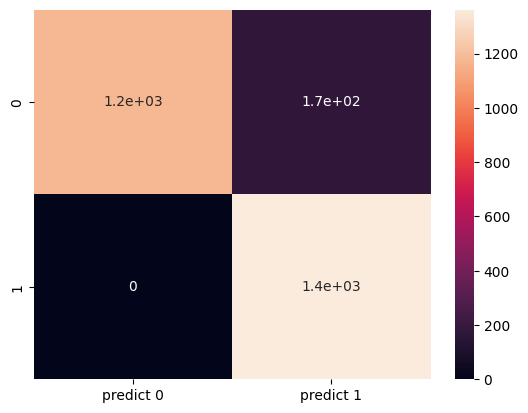

In [30]:
cmkn = metrics.confusion_matrix(Y_test, yk_predict, labels=[0,1])
dfkn = pd.DataFrame(cmkn, index=[i for i in [0,1]], columns= [i for i in ["predict 0", "predict 1"]] )

sns.heatmap(dfkn, annot = True)
plt.show()

### NAIVE BAYES

In [31]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()

nb.fit(X_train,Y_train)

yn_predict = nb.predict(X_test)

print(nb.score(X_train,Y_train))
print(nb.score(X_test,Y_test))

0.82948798988622
0.8193215339233039


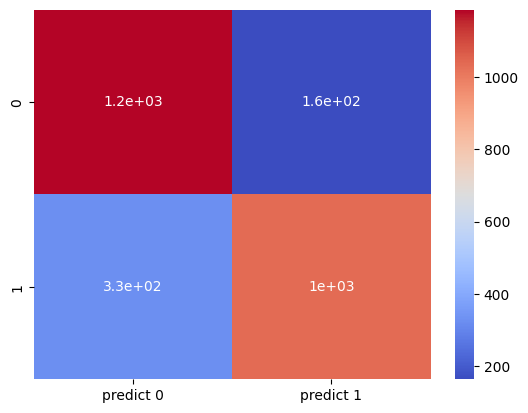

In [32]:
cmnb = metrics.confusion_matrix(Y_test,yn_predict, labels=[0, 1])
dfnb = pd.DataFrame(cmnb, index=[i for i in [0, 1]], columns = [i for i in["predict 0","predict 1"]])

sns.heatmap(dfnb, annot = True, cmap="coolwarm")
plt.show()

### SVM

In [33]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Initialize the Support Vector Machine model
svm = SVC()

# Train the model
svm.fit(X_train, Y_train)

# Make predictions on the test set
y_pred_svm = svm.predict(X_test)

# Calculate accuracy score
accuracy_svm = accuracy_score(Y_test, y_pred_svm)

# Print accuracy score
print("SVM Accuracy Score:", accuracy_svm)


SVM Accuracy Score: 0.875


### DESICION TREE


In [34]:
from sklearn.tree import DecisionTreeClassifier

# Initialize the Decision Tree model
dt = DecisionTreeClassifier()

# Train the model
dt.fit(X_train, Y_train)

# Make predictions on the test set
y_pred_dt = dt.predict(X_test)


# Calculate accuracy score
accuracy_dt = accuracy_score(Y_test, y_pred_dt)

# Print accuracy score
print("Decision Tree Accuracy Score:", accuracy_dt)


Decision Tree Accuracy Score: 0.9933628318584071


### RANDOM FOREST CLASSIFIER

In [35]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest model
rf = RandomForestClassifier()

# Train the model
rf.fit(X_train, Y_train)

# Make predictions on the test set
y_pred_rf = rf.predict(X_test)

# Calculate accuracy score
accuracy_rf = accuracy_score(Y_test, y_pred_rf)

# Print accuracy score
print("Random Forest Accuracy Score:", accuracy_rf)


Random Forest Accuracy Score: 0.9944690265486725
